# National Trend

In [1]:
from pathlib import Path

import numpy as np
import seaborn as sns; sns.set(rc={'figure.figsize':(10, 10)})
import pandas as pd

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from src import utils, fitters

In [5]:
df = utils.extract_data(utils.national_data)

In [6]:
df.head()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-02-24,101,26,127,94,221,221,1,7,229,4324
2020-02-25,114,35,150,162,311,90,1,10,322,8623
2020-02-26,128,36,164,221,385,74,3,12,400,9587
2020-02-27,248,56,304,284,588,203,45,17,650,12014
2020-02-28,345,64,409,412,821,233,46,21,888,15695


## Total Deceted Positive 

In [7]:
x = utils.get_date_range(df.index)
y = df["totale_casi"].to_numpy()

In [8]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))

In [9]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [10]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]))

Logistic(27.037106417440047, 0.19423971240368007, 117476.72668803524)
Peak:  2020-03-22
10% done: 2020-03-10
25% done: 2020-03-16
50% done: 2020-03-22
75% done: 2020-03-27
95% done: 2020-04-06
Plateau: 117476
GenLogistic(15.555436797041553, 0.07680312610961909, 295157.05595104146, 0.2145018281055403)
Peak:  2020-04-03
10% done: 2020-03-16
25% done: 2020-03-24
50% done: 2020-04-03
75% done: 2020-04-15
95% done: 2020-05-08
Plateau: 295157
Gompertz(217.6551543755966, 0.04419605006586241, 667059.0582757203)
Peak:  2020-04-11
10% done: 2020-03-23
25% done: 2020-04-03
50% done: 2020-04-19
75% done: 2020-05-09
95% done: 2020-06-17
Plateau: 667059


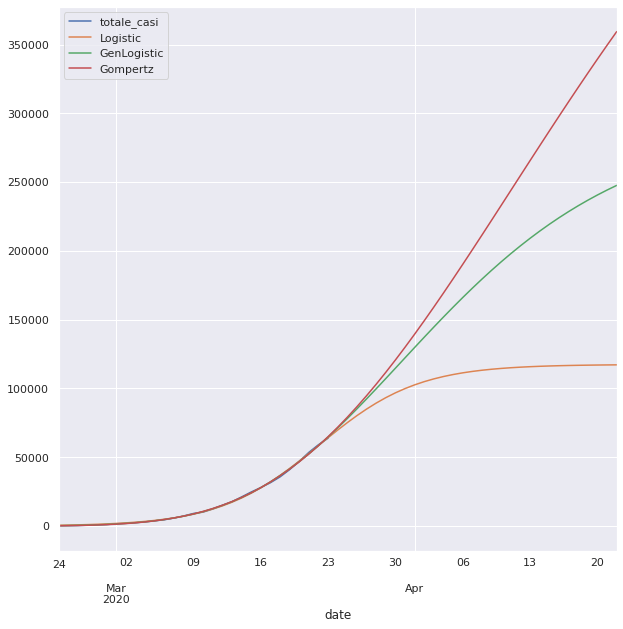

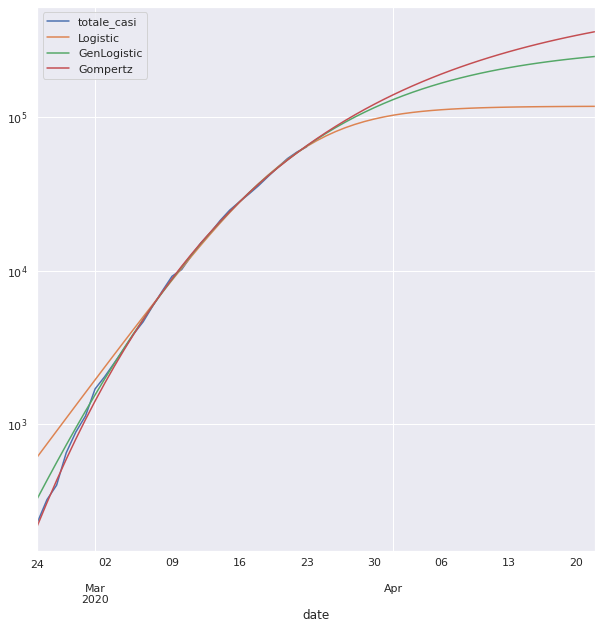

In [11]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "totale_casi", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);

## Lockdown effect 

In [12]:
lock_df = df.loc["2020-03-08":,:]
displacement = utils.ndays_since_start("2020-03-08", df)

In [13]:
l_x = utils.get_date_range(lock_df.index) + displacement
l_y = lock_df.totale_casi.to_numpy()

ul_x_cont = np.arange(0, displacement)
l_x_cont = np.arange(displacement, x.max()+30)

In [14]:
l_logistic = fitters.Logistic.fit(l_x, l_y, p0=[10, 2, 50000], bounds=([0, 0.1, 50000],[100, 30, np.inf]))
l_gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)
l_gompertz = fitters.Gompertz.fit(l_x, l_y, p0=[10, 2, 10000], bounds=([1, 0.001, 5000],[np.inf, 5, np.inf]))

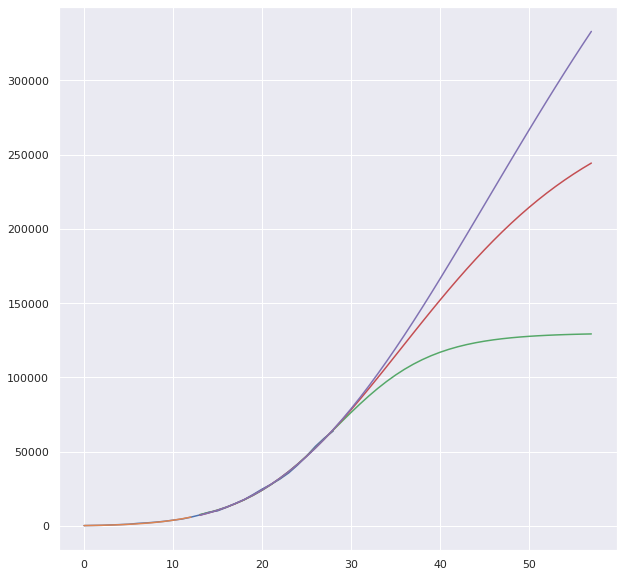

In [15]:
sns.lineplot(x, y)
sns.lineplot(ul_x_cont, gompertz.compute(ul_x_cont))
sns.lineplot(l_x_cont, l_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gen_logistic.compute(l_x_cont))
sns.lineplot(l_x_cont, l_gompertz.compute(l_x_cont));

In [16]:
utils.summary_of_model(l_logistic, df)
utils.summary_of_model(l_gen_logistic, df)
utils.summary_of_model(l_gompertz, df)

Logistic(28.068257083035647, 0.1843205023380399, 129853.03486626562)
Peak:  2020-03-23
10% done: 2020-03-11
25% done: 2020-03-17
50% done: 2020-03-23
75% done: 2020-03-29
95% done: 2020-04-08
Plateau: 129853
GenLogistic(15.555436797041553, 0.07680312610961909, 295157.05595104146, 0.2145018281055403)
Peak:  2020-04-03
10% done: 2020-03-16
25% done: 2020-03-24
50% done: 2020-04-03
75% done: 2020-04-15
95% done: 2020-05-08
Plateau: 295157
Gompertz(193.55526731838626, 0.04592282191460018, 598376.979243803)
Peak:  2020-04-09
10% done: 2020-03-22
25% done: 2020-04-02
50% done: 2020-04-17
75% done: 2020-05-06
95% done: 2020-06-13
Plateau: 598376


## Deaths 

In [17]:
x = utils.get_date_range(df.index)
y = df["deceduti"].to_numpy()

In [18]:
logistic = fitters.Logistic.fit(x, y, p0=[10, 2, 5000], bounds=([0, 0.01, 1000],[100, 30, np.inf]))

In [19]:
gen_logistic = fitters.GenLogistic.fit(x, y, p0=[10, 2, 5000, 1], bounds=([-np.inf, 0.01, 1000, 0], [100, 30, np.inf, 5]), jac='cs', max_nfev=10000)

In [20]:
gompertz = fitters.Gompertz.fit(x, y, p0=[10, 2, 10000], bounds=([1, 0.001, 1000],[np.inf, 5, np.inf]))

Logistic(27.873582509123985, 0.22590585681411862, 12014.501893391436)
Peak:  2020-03-22
10% done: 2020-03-13
25% done: 2020-03-18
50% done: 2020-03-22
75% done: 2020-03-27
95% done: 2020-04-04
Plateau: 12014
GenLogistic(-187.6651126654133, 0.048218949833355826, 85456.46010651175, 1.157129003465036e-05)
Peak:  2020-04-19
10% done: 2020-03-25
25% done: 2020-04-05
50% done: 2020-04-19
75% done: 2020-05-07
95% done: 2020-06-12
Plateau: 85456
Gompertz(3.3285157909764593, 0.04820222133555361, 85551.5758508916)
Peak:  2020-04-12
10% done: 2020-03-25
25% done: 2020-04-05
50% done: 2020-04-19
75% done: 2020-05-07
95% done: 2020-06-12
Plateau: 85551


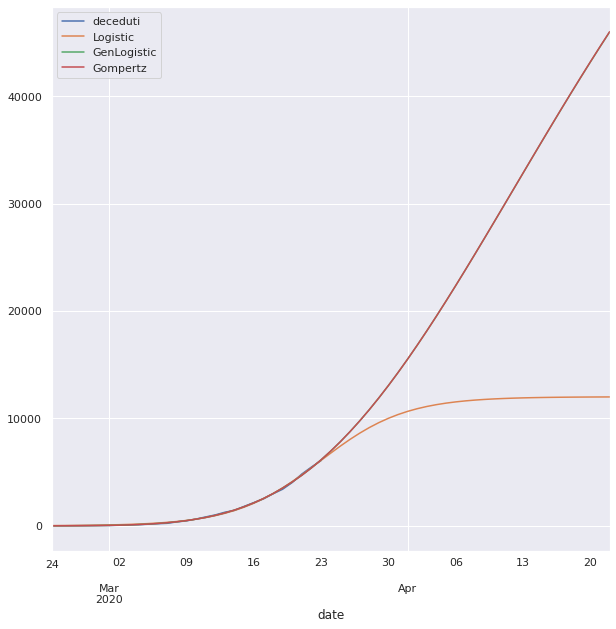

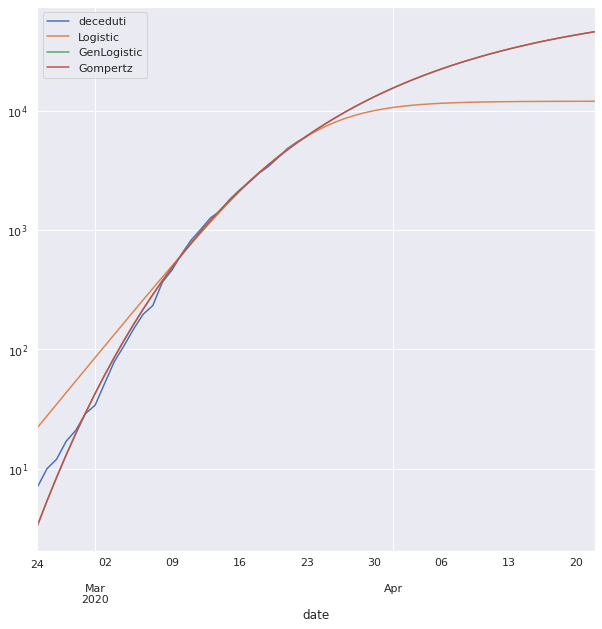

In [21]:
models = [logistic, gen_logistic, gompertz]
mod_df = utils.collect_models(models, df, "deceduti", 30)
utils.summaries(models, df)
mod_df.plot(); mod_df.plot(logy=True);